In [1]:
from PIL import Image
import numpy as np
import os
import json
import pickle
import sys
sys.path.append(os.path.join(os.getcwd(), 'histocartography'))

from histocartography.preprocessing import NucleiExtractor, DeepFeatureExtractor, KNNGraphBuilder

/data/mn27889/miniconda3/envs/path-rag/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/mn27889/miniconda3/envs/path-rag/lib/python3.9/site-packages/torchdata/datapipes/__init__.py:18: UserWarning: 
################################################################################
WARNING!
The 'datapipes', 'dataloader2' modules are deprecated and will be removed in a
future torchdata release! Please see https://github.com/pytorch/data/issues/1196
to learn more and leave feedback.
################################################################################

  deprecation_warning()


In [47]:
from histocartography.preprocessing import NucleiExtractor, DeepFeatureExtractor, KNNGraphBuilder

PVQA_DATA_PATH = "pvqa"
HISTO_PATCH_SAVE_PATH = "histo_image_patch"
ARCH_DATA_PATH = "arch"

# Cell Graph Generation Definitions
nuclei_detector = NucleiExtractor()
feats_extractor = DeepFeatureExtractor(architecture='resnet34', patch_size=72, resize_size=224)
knn_graph_builder = KNNGraphBuilder(k=5, thresh=50, add_loc_feats=True)

File already downloaded.
/data/mn27889/path-rag/histocartography/histocartography/preprocessing/../../checkpoints/pannuke.pt


/data/mn27889/miniconda3/envs/path-rag/lib/python3.9/site-packages/torch/serialization.py:1113: SourceChangeWarning: source code of class 'histocartography.ml.models.hovernet.HoverNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/data/mn27889/miniconda3/envs/path-rag/lib/python3.9/site-packages/torch/serialization.py:1113: SourceChangeWarning: source code of class 'histocartography.ml.models.hovernet.Encoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/data/mn27889/miniconda3/envs/path-rag/lib/python3.9/site-packages/torch/serialization.py:1113: SourceChangeWarning: source code of class 'histocartography.ml.models.hov

In [40]:
data_path = "arch"

# Extract the image data for PubMed dataset
pubmed_path_images = os.path.join(data_path, "pubmed_set", "images")
pubmed_img_uuid = os.listdir(pubmed_path_images)
pubmed_img_uuid = [uuid.split('.')[0] for uuid in pubmed_img_uuid]
pubmed_img_uuid_path = [os.path.join(pubmed_path_images, img_uuid + '.jpg') for img_uuid in pubmed_img_uuid]

# Extract the image data for Books dataset
books_path_images = os.path.join(data_path, "books_set", "images")
books_img_uuid = os.listdir(books_path_images)
books_img_uuid = [uuid.split('.')[0] for uuid in books_img_uuid]
books_img_uuid_path = [os.path.join(books_path_images, img_uuid + '.png') for img_uuid in books_img_uuid]

In [42]:
Image.open(pubmed_img_uuid_path[1])

'arch/pubmed_set/images/4f540c95-6b96-4034-a51e-611b36ffe54a.jpg'

In [53]:
pubmed_img_uuid_path[1]

'arch/pubmed_set/images/4f540c95-6b96-4034-a51e-611b36ffe54a.jpg'

In [54]:
query_img = Image.open(pubmed_img_uuid_path[1]).convert(mode="RGB")

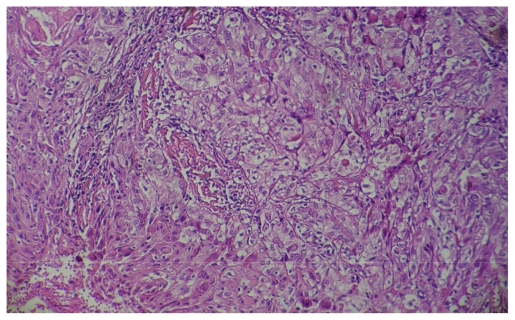

In [55]:
query_img

In [56]:
image = np.array(query_img)
nuclei_map, nuclei_centers = nuclei_detector.process(image)

In [57]:
nuclei_centers

array([], shape=(0, 2), dtype=float64)